In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load Data

# Set some display options for better readability
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# Load the dataset
df = pd.read_csv('data/crm_data.csv')

# Display the first 5 rows to confirm it's loaded correctly
df.head()


,CustomerID,Age,Gender,Location,SubscriptionTier,Tenure,MonthlyRevenue,UsageFrequency,SupportTickets,LastInteraction,Churn
0,539437dc-664b-480c-9937-790233cc3ce9,27,Male,Houston,Premium,39,109.62,66,2,17,0
1,528c42a3-b6a1-45df-913d-b2ecc0ac021b,60,Female,New York,Premium,60,108.37,108,0,35,0
2,f653e6b1-ed4b-4d26-b5e0-0bbf32f6a476,60,Male,San Jose,Premium,59,137.84,81,0,14,0
3,6217dde2-65c5-4620-9454-9877fbc55439,51,Male,Dallas,Basic,14,24.09,19,0,4,0
4,e13935ce-0394-4476-93c2-cb38ca14741a,60,Female,New York,Premium,54,87.08,98,0,57,0


In [5]:
# The EDA Process

print("--- Data Info ---")
df.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        10000 non-null  object 
 1   Age               10000 non-null  int64  
 2   Gender            10000 non-null  object 
 3   Location          10000 non-null  object 
 4   SubscriptionTier  10000 non-null  object 
 5   Tenure            10000 non-null  int64  
 6   MonthlyRevenue    10000 non-null  float64
 7   UsageFrequency    10000 non-null  int64  
 8   SupportTickets    10000 non-null  int64  
 9   LastInteraction   10000 non-null  int64  
 10  Churn             10000 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 859.5+ KB


In [6]:
print("\n\n--- Descriptive Statistics (Numerical) ---")
print(df.describe())



--- Descriptive Statistics (Numerical) ---
                Age        Tenure  MonthlyRevenue  UsageFrequency  \
count  10000.000000  10000.000000    10000.000000    10000.000000   
mean      43.464300     30.649300       63.704843       45.996500   
std       12.670635     17.419732       41.557695       27.499417   
min       22.000000      1.000000       10.020000        1.000000   
25%       33.000000     16.000000       25.050000       23.000000   
50%       43.000000     31.000000       55.220000       46.000000   
75%       54.000000     46.000000       97.965000       68.000000   
max       65.000000     60.000000      149.990000      120.000000   

       SupportTickets  LastInteraction         Churn  
count    10000.000000     10000.000000  10000.000000  
mean         0.862700        45.671400      0.150000  
std          1.355667        25.742216      0.357089  
min          0.000000         1.000000      0.000000  
25%          0.000000        24.000000      0.000000  
50%

In [7]:
print("\n\n--- Descriptive Statistics (Categorical) ---")
print(df.describe(include=['object']))



--- Descriptive Statistics (Categorical) ---
                                  CustomerID Gender Location SubscriptionTier
count                                  10000  10000    10000            10000
unique                                 10000      2       10                3
top     539437dc-664b-480c-9937-790233cc3ce9   Male   Dallas          Premium
freq                                       1   5082     1039             3372


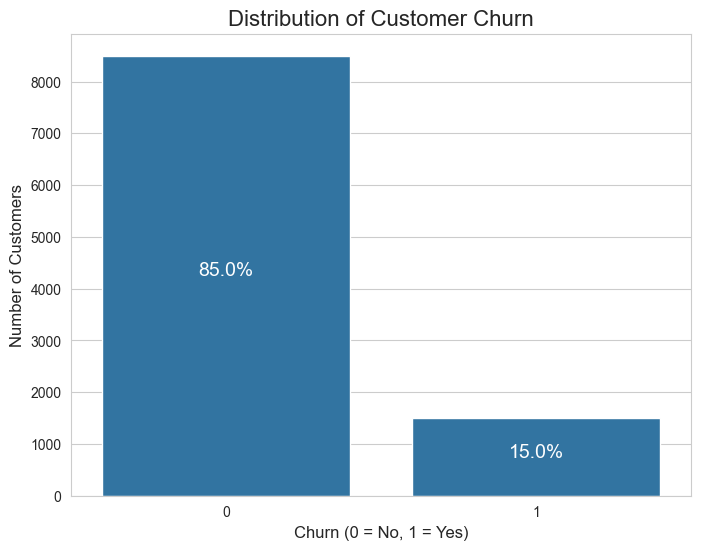

In [15]:
# Visualize the Target Variable

# Visualize Churn Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn', fontsize=16)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Calculate and display the percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
plt.text(0, df['Churn'].value_counts()[0]/2, f'{churn_rate[0]:.1f}%', ha='center', color='white', fontsize=14)
plt.text(1, df['Churn'].value_counts()[1]/2, f'{churn_rate[1]:.1f}%', ha='center', color='white', fontsize=14)

plt.show()

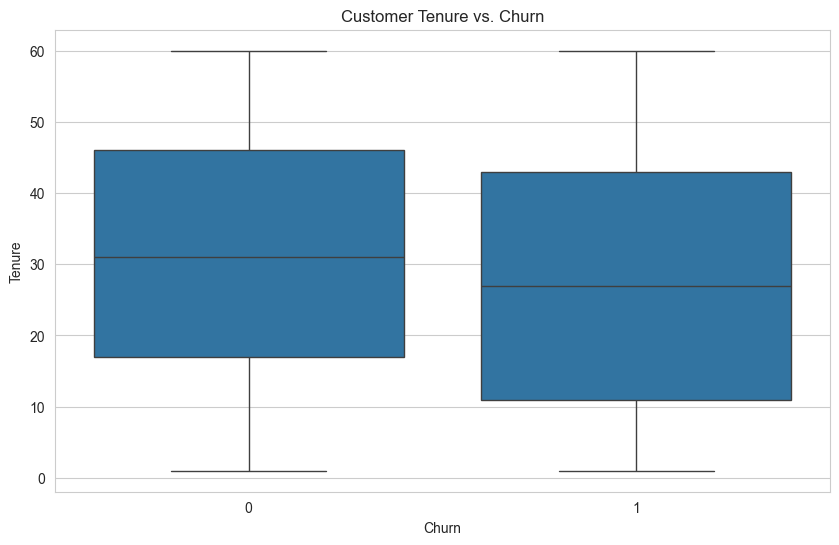

In [16]:
# Tenure vs. Churn

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Customer Tenure vs. Churn')
plt.show()

# What this tells us: We expect to see that customers who churned (Churn=1) generally have a lower median tenure.

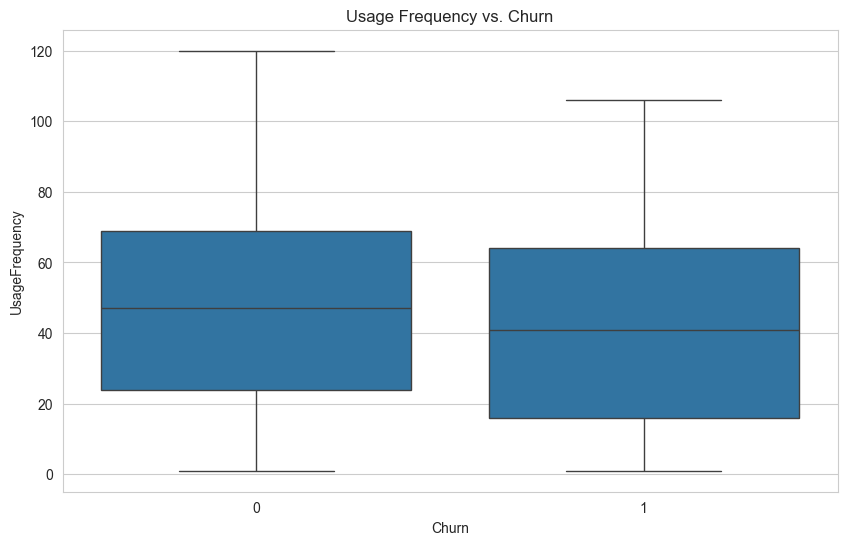

In [17]:
# Usage Frequency vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='UsageFrequency', data=df)
plt.title('Usage Frequency vs. Churn')
plt.show()

# What this tells us: This should clearly show that churned customers have a significantly lower usage frequency. This validates one of the rules we built into our data generation!

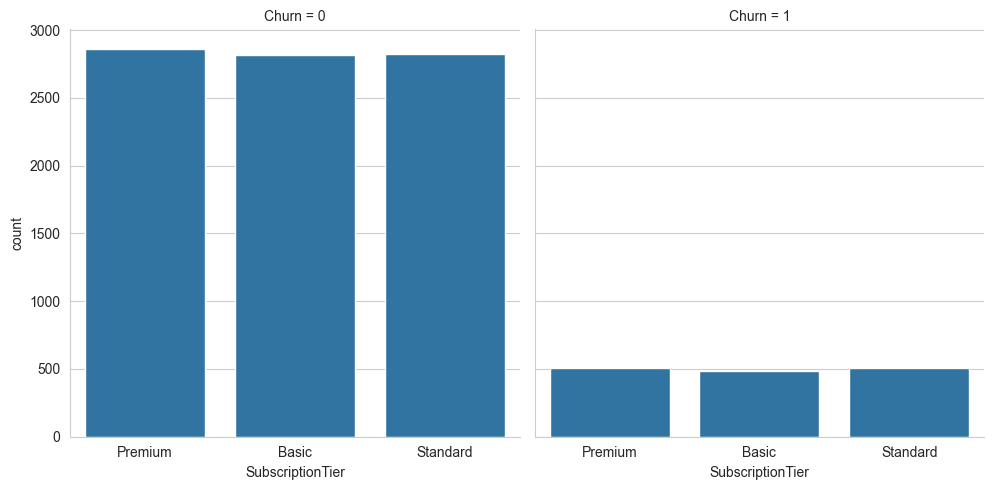

In [18]:
# Subscription Tier vs. Churn
sns.catplot(x='SubscriptionTier', col='Churn', data=df, kind='count', height=5, aspect=1)
plt.show()

# What this tells us: This creates two separate bar charts, one for each churn status. It helps us see if certain subscription tiers are more prone to churn.

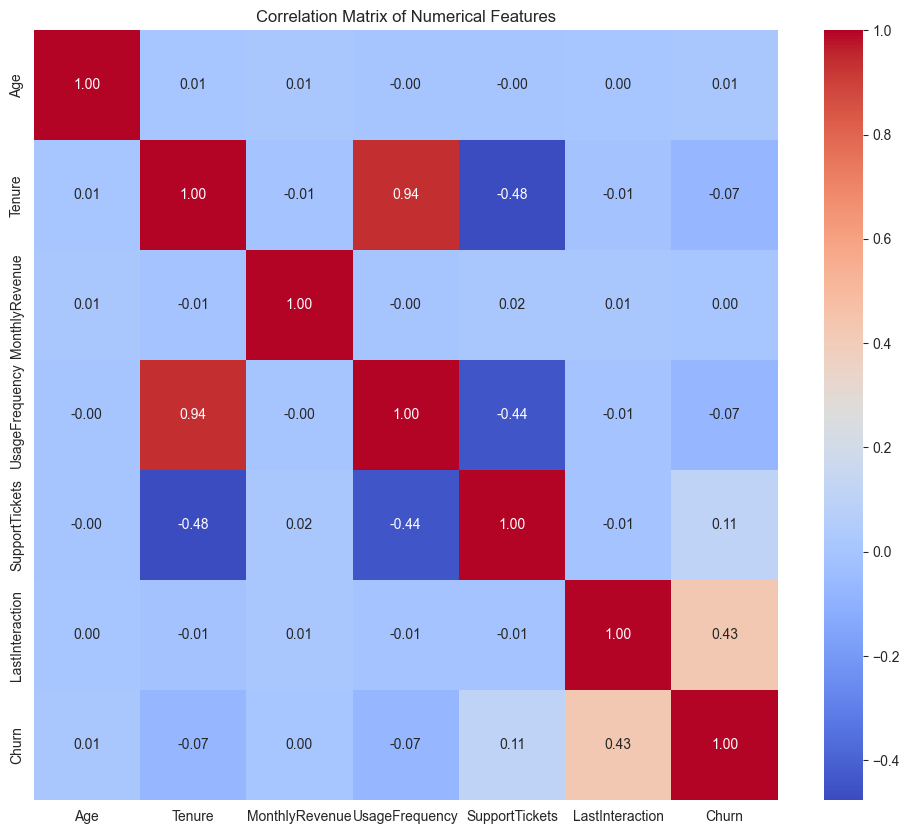

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))

# Select only numeric types for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Understanding the Colors

* Dark Blue: Means a strong negative correlation. When one thing goes up, the other tends to go down. Think of it like two magnets pushing each other away.

* Dark Red: Means a strong positive correlation. When one thing goes up, the other tends to go up too. Like two friends who always do things together.

* Lighter Colors (towards white): Mean weaker or no correlation. They don't really affect each other much.

#### What the Heatmap Tells Us About Churn
* Churn and Tenure / UsageFrequency (The Good News!):
    * Notice the dark blue where 'Churn' meets 'Tenure' (how long a customer has been with us) and 'UsageFrequency' (how often they use our product).
    * This tells us there's a strong negative correlation. It means:
        * The longer a customer stays (higher Tenure), the less likely they are to churn. Makes sense, right? Loyal customers stick around.
        * The more frequently they use our product (higher UsageFrequency), the less likely they are to churn. Engaged customers are happy customers.
    * This is great! It confirms that these two factors are super important, and they work just like we'd expect in real life. Our model will definitely want to pay attention to these.

* Churn and SupportTickets / LastInteraction (The Warning Signs):

    * Now, look at the dark red where 'Churn' meets 'SupportTickets' (how many times they've needed help) and 'LastInteraction' (how many days since we last heard from them).
    * This shows a strong positive correlation. It means:
        * The more support tickets a customer creates, the more likely they are to churn. Too many problems can drive anyone away.
        * The longer it's been since we last interacted with a customer, the more likely they are to churn. Silence can mean they're slipping away.
    * These are crucial warning signs. If we see customers with lots of support issues or who've gone quiet, we know they're at a higher risk of leaving. Again, this matches our intuition and confirms the logic we built into our data!

#### Other Connections (Multicollinearity)

+ You'll also see other correlations that don't involve 'Churn' directly. For example, look at the connection between 'Tenure' and 'UsageFrequency'.

    * There's likely some darker blue there, showing a negative correlation. This means that as Tenure (how long they've been with us) increases, UsageFrequency tends to increase too. This makes perfect sense: the longer a customer is around, the more they use the product.
    * When we see strong connections like this between two of our input features (like Tenure and UsageFrequency), it's called multicollinearity. It just means these features aren't completely independent; they tend to move together. It's something to be aware of, but for most of what we're doing, it's totally fine.